#  이상기온 찾기  

## 이상기온이란?


1, 기준이 되는 평년 데이터 30년간(1981~2010년, 10년마다 갱신)의 기온 데이터를 가지고, \
2, 알고자 하는 월,일로부터 +- 30일 데이터를 평년에서 매년 가져온다.\
3, 일열로 나열하고 알고자 하는 년도의 월, 일 기온데이터를 리스트에 넣어줬을떄,\
4, index 값이 리스트 길이의 10% 미만 혹은 90% 초과일떄, 이를 `이상기온`이라 정의한다.

오늘 날씨가 이상기온인지 아닌지를 판단하는 방법: 평년과 비교해보기.  
평년은 ~ 인것.

2021년 5월 5일이 이상기온인지 아닌지 확인하려고 하면,  
평년(2021년 기준을 기준으로 이전 30년, 1991~2020)

1991부터 2020까지 각 년도의 00월 00일 부터 00월 00일(5월 5일 전후 한달)의 데이터를 모두 가져옴.  
2021년 5월 5일의 기온이 가져온 데이터에서 어디에잇는지 확인.  
10%, 90% 깆ㄴ으로 이상기온

# 구현

먼저 csv에 저장되어 있는 수치들을 읽어온다.
수치들은 아래와 같이 저장되어 있으며,\
이번 구현에서는 index 0번과 3번만 사용한다.

In [40]:
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

temperature에는 일수마다 어떤 기온이 있었는지 저장할것이며,\
day 는 월,일("01-01","01-02")을 일수(0,1)으로 바꿔준 값을 저장할 것이며,\
num는 위에 일수 카운트를 하는 변수이고,\
standard는 평년의 평균값을 넣어줄 것이다.\

먼저 1980년대는 평년에 안들어가고 윤년에 해당하므로 먼저 1980년대를 사용해서 데이터의 구조를 만든다
$윤년이므로 1년은 366일이다
`아무것도 안나왔으면 위에 코드를 한번 더 실행한 뒤에 실행할 것`

In [41]:
temperature=[]
day={}
num=0
standard=[]
for row in data :
    if 1980==int(row[0][:4]):
        day[row[0][5:10]]=num
        temperature.append([])
        num+=1
        standard.append(0)
        if row[0][5:10]=='12-31':
            break
            
print('temperature :',len(temperature),temperature)
print("day : ",day)
print("standard :",len(standard),standard)

temperature : 366 [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [

이제 평년 데이터를 리스트 안에 넣어주는 작업을 한다.\
월, 일에 해당되는 index 번째 리스트에 넣어주며,\
윤연일때와 아닐때를 구분지어 평균 온도를 계산해서 넣어준다.

In [42]:
for row in data :
    if 1980<int(row[0][:4])<2011:
        temperature[day[row[0][5:10]]].append(float(row[3]))
        if row[0][5:10]!='02-29':
            standard[day[row[0][5:10]]]+=float(row[3])/30
        else :
            standard[day[row[0][5:10]]]+=float(row[3])/6
    if row[0]=='2010-12-31':
        break
print('temperature :',len(temperature[0]),temperature)
print("standard :",len(standard),standard)

temperature : 30 [[-6.3, -5.3, -4.7, -9.7, -6.9, -12.2, -8.5, -4.4, -3.4, -4.0, -4.5, -0.7, -5.0, -6.8, -5.9, -7.9, -9.9, 0.2, -6.9, 1.8, -9.5, -7.5, -7.1, 1.2, -8.8, 0.6, 0.0, -8.5, -9.5, -12.7], [-12.5, -4.1, -2.9, -2.5, -5.0, -13.0, -1.7, -4.3, -4.0, -5.7, -7.9, -1.5, 1.1, -0.3, -5.9, -3.9, -11.0, -0.8, -0.5, -0.9, -9.1, -11.4, -9.2, 1.6, -5.0, -2.4, 1.5, -7.4, -6.9, -7.4], [-14.7, -2.3, -4.2, -6.5, -3.6, -7.1, -7.6, -6.2, -4.1, -7.2, -9.7, -5.0, -5.7, -0.3, -0.4, -8.5, -9.9, 2.7, -2.8, -4.6, -10.4, -12.0, -6.8, 1.6, -2.0, -4.5, 1.6, -3.0, -5.6, -10.5], [-16.5, -0.4, -3.3, -9.3, -7.6, -16.5, -9.6, -3.2, -7.2, -8.9, -10.8, -6.4, -7.9, -4.6, -3.6, -10.7, -10.0, -8.3, -3.0, -4.3, -12.5, -3.4, -13.4, -1.7, -7.4, -8.3, 0.8, -4.0, -2.8, -8.0], [-14.9, -3.6, -0.4, -12.0, -9.4, -19.2, -6.5, -6.7, -7.6, -2.4, -12.8, -2.5, -7.1, -1.9, -4.7, -2.1, -6.4, -6.2, -1.9, 0.1, -11.0, -3.0, -15.5, -2.2, -8.8, -10.0, 1.0, -2.4, -3.4, -12.3], [-15.3, -5.2, -1.3, -12.1, -9.6, -16.9, -2.5, -6.9, 0.1, -5.6

이번에는 일수에 맞게 평년에서 해당되는 날짜와 +-30일 동안의 값들을 한곳에 모은 리스트를 만듭니다.

In [43]:
group=[]
for num in range(366):
    temp=[]
    for i in range(61):
        temp+=temperature[(num+i-31)%366]
    group.append(sorted(temp))
    
print(len(group),len(group[0]))

366 1830


이번에는 만든 group을 가지고 알고 싶은 연도의 원일을 넣었을떄 어떻게 되는지 볼 것 입니다.
row에 해당되는 일수의 group을 호출한 뒤에,
row의 기온 데이터를 넣습니다.
그리고 list를 정렬시켜 준 뒤에 index값을 반환받고, 
그 값이 10%미만이거나 90%초과이면 row의 연도마다 나뉘어진 이상기온 list에 넣어줍니다.

In [44]:
from copy import copy
year_ub=[]
abnormal_temperature=[]
for row in data :
    if row!=[]:
        temp=copy(group[day[row[0][5:10]]])
        temp.append(float(row[3]))
        temp.sort()
        location=temp.index(float(row[3]))
        if location<183 or location>1647:
            year_ub.append([day[row[0][5:10]],float(row[3])])
        if row[0][5:10]=="12-31":
            abnormal_temperature.append(sorted(year_ub))
            year_ub=[]
            
print(len(abnormal_temperature))
print(abnormal_temperature)

9
[[[9, -11.8], [11, -11.1], [12, -11.1], [14, -15.7], [15, -17.8], [16, -14.1], [23, -10.9], [24, -11.9], [26, -11.5], [28, -11.5], [29, -13.6], [30, -12.7], [72, 8.5], [139, 18.8], [168, 22.1], [171, 22.7], [218, 26.1], [308, 15.4], [309, 16.4], [310, 12.9], [313, 12.5], [321, 10.5], [322, 11.9], [331, 8.7], [332, 13.6], [333, 9.2], [350, -9.8], [351, -10.6], [357, -10.1]], [[18, 1.4], [19, 3.7], [21, -11.6], [22, -12.2], [23, -11.8], [24, -11.6], [31, -15.3], [32, -17.1], [33, -14.5], [37, -11.5], [38, -12.1], [48, -9.6], [49, -9.6], [61, 5.2], [71, -5.7], [121, 17.3], [122, 19.0], [123, 17.0], [175, 23.6], [204, 25.6], [205, 25.5], [209, 25.2], [210, 26.2], [212, 26.6], [213, 25.9], [214, 26.8], [215, 27.1], [216, 28.2], [217, 27.5], [218, 27.8], [219, 26.6], [220, 25.6], [221, 26.6], [222, 25.7], [230, 25.8], [231, 26.3], [340, -10.3], [342, -11.0], [343, -13.2], [344, -11.8], [345, -10.4], [346, -9.0], [353, -10.4], [357, -12.5], [358, -13.6], [359, -13.7], [360, -14.5], [361, -1

이제 그래프로 그려보는 작업을 해보겠습니다.\
먼저 만들었던 이상기온을 연도를 선택해서 그리는 것 입니다.

알고 싶은 해의 이상기후(2011~2019) : 2012


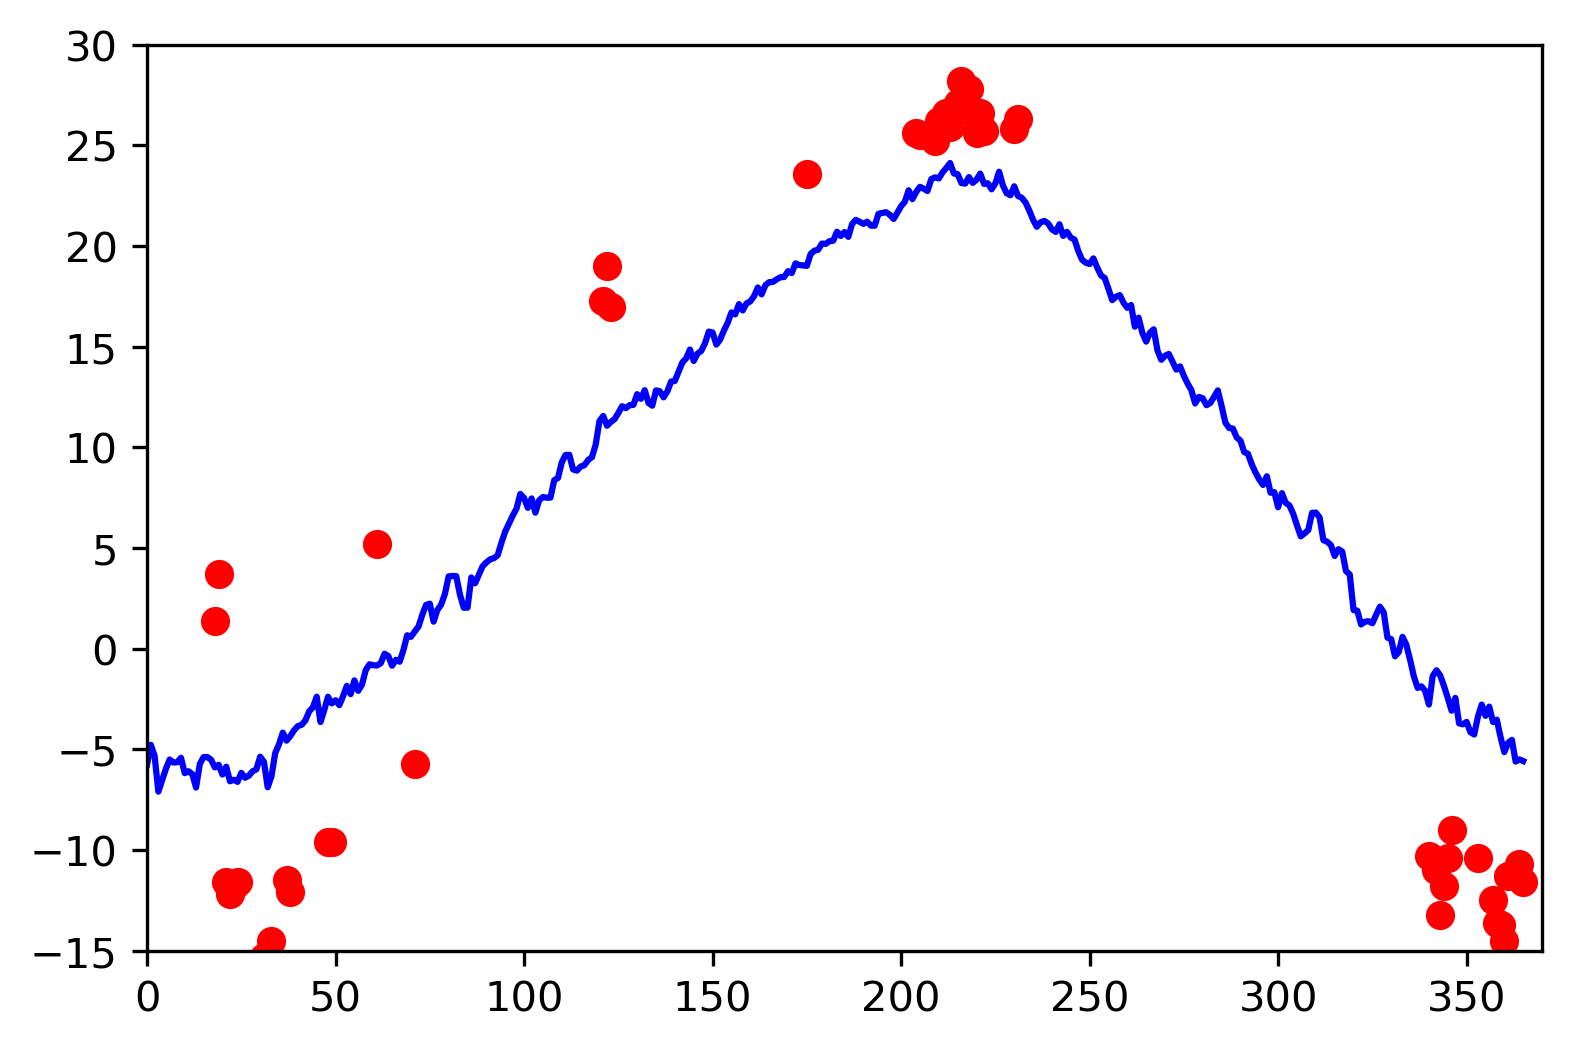

In [46]:
import matplotlib.pyplot as plt
want_know_year=int(input('알고 싶은 해의 이상기후(2011~2019) : '))
want_know_year-=2011

output_x=[]
output_y=[]
for j in abnormal_temperature[want_know_year]:
    output_x.append(j[0])
    output_y.append(j[1])

plt.figure( dpi = 300)
plt.plot(standard,'b') #reulst를 빨간색으로
plt.plot(output_x,output_y,'ro')
plt.axis([0,370,-15,30])
plt.show()

다음에는 2011년에서 2019년까지 이상기온을 나타내는 것 입니다.

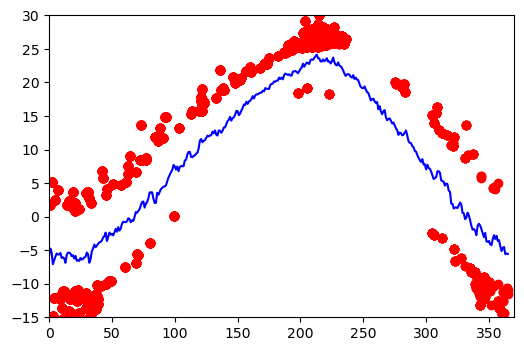

In [49]:
import matplotlib.pyplot as plt

output_year=[]

plt.figure( dpi = 100)
for i in abnormal_temperature:
    output_x=[]
    output_y=[]
    for j in i:
        output_x.append(j[0])
        output_y.append(j[1])
        plt.plot(output_x,output_y,'ro')

plt.plot(standard,'b') #reulst를 빨간색으로
plt.axis([0,370,-15,30])
plt.show()

다음에는 일수마다 이상기온이 얼마나 발생했는지 나타내는 그래프 입니다.
abnormal_temperature 은 년의 따른 이상기온 list
year_ub_normal 은 그 해의 이상기온 list
day_ub_normal 은 날의 (일수,이상기온)

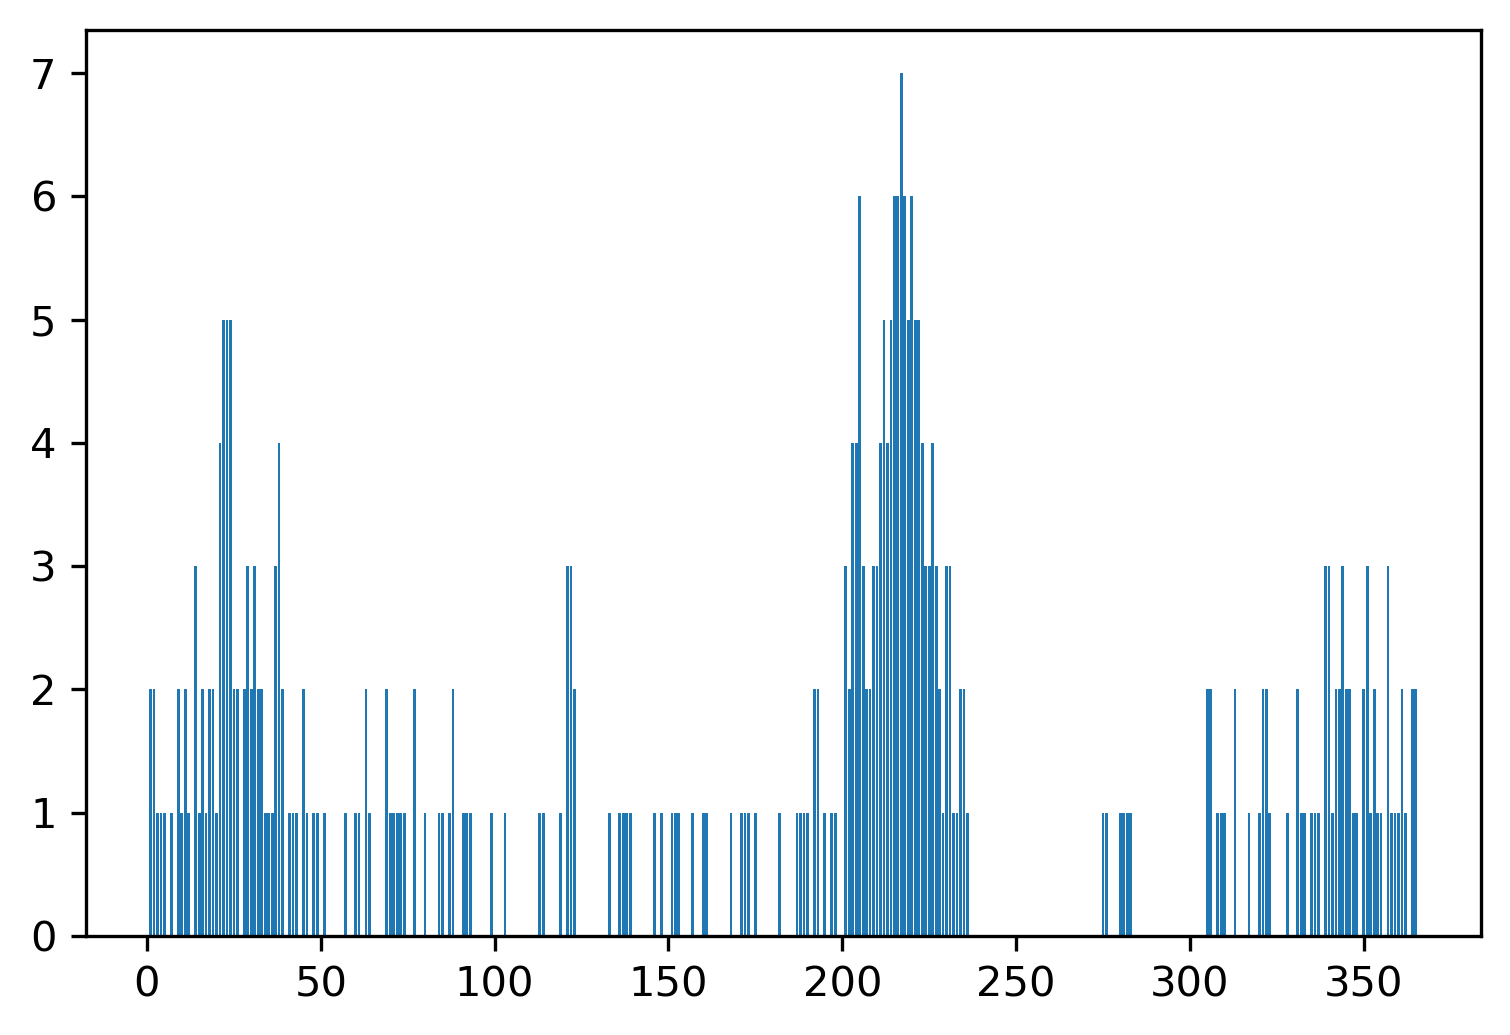

In [47]:
num_ub_day={}

for year_ub_normal in abnormal_temperature:
    for day_ub_normal in year_ub_normal:
        temp=num_ub_day.get(day_ub_normal[0],0)
        num_ub_day[day_ub_normal[0]]=temp+1
        
x=list(num_ub_day.keys())
y=num_ub_day.values()

plt.figure( dpi = 300)
plt.bar(x,y)
plt.show()

해마다 몇번의 이상기온이 발생했는지 나타내는 그래프

[29, 50, 45, 22, 27, 57, 36, 60, 27]


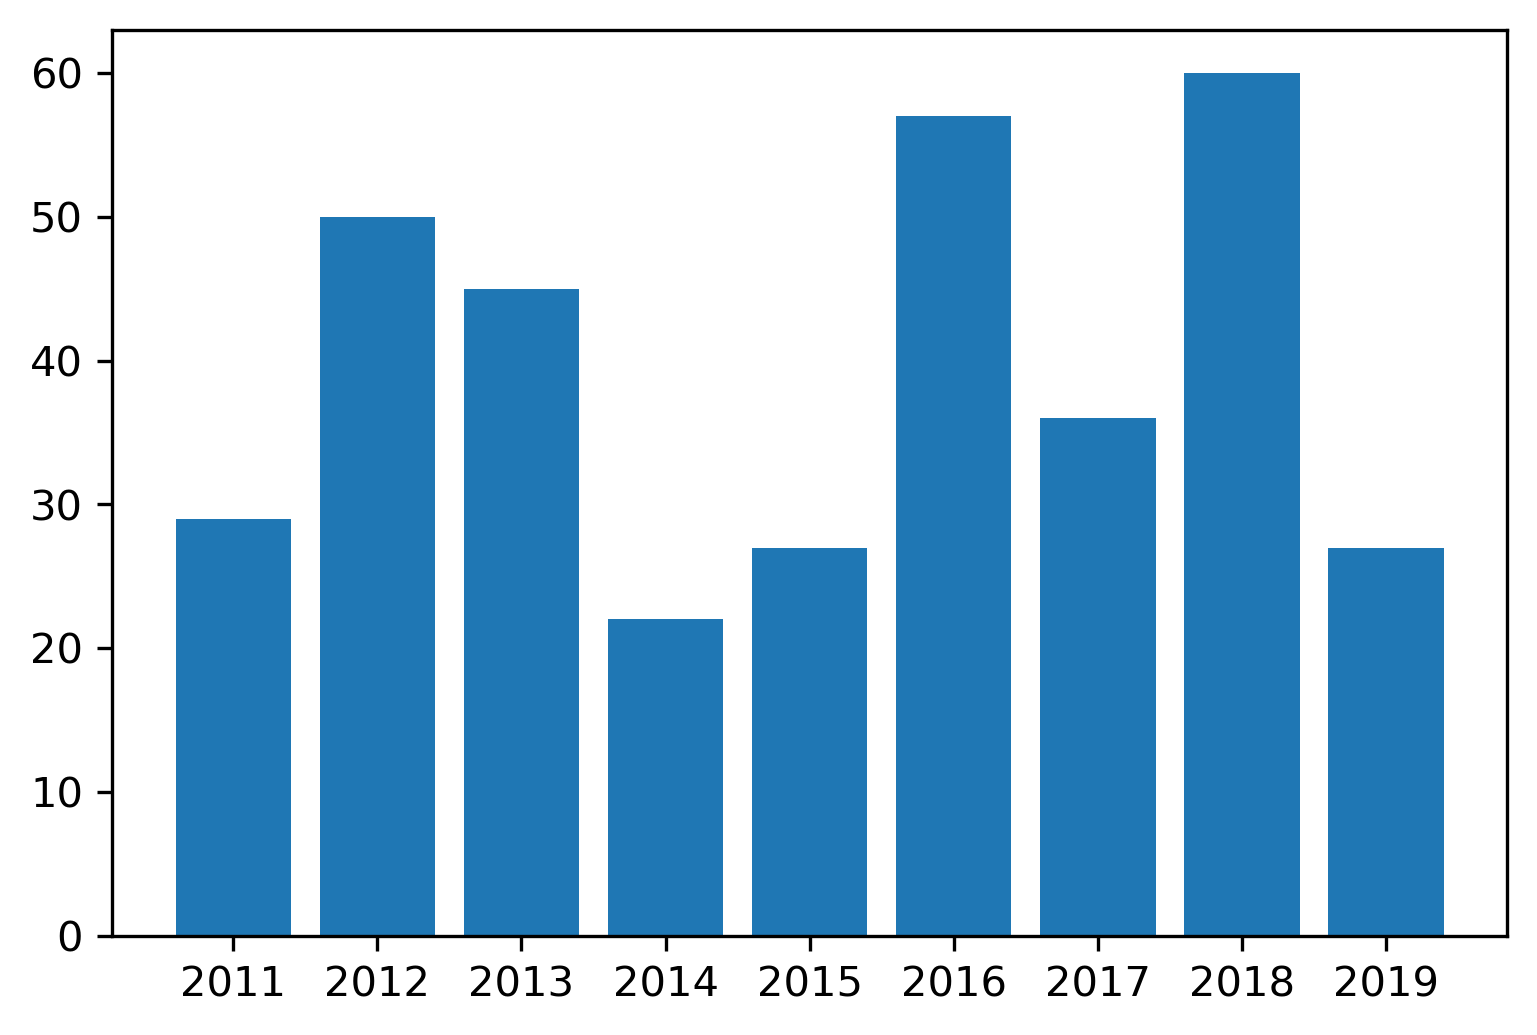

In [50]:
x=range(9)
x_name=[i for i in range(2011,2020)]
num_ub_year=[]

for i in abnormal_temperature:
    num_ub_year.append(len(i))
print(num_ub_year)
plt.figure( dpi = 300)
plt.bar(x,num_ub_year) 
plt.xticks(x,x_name)
plt.show()

다음에는 이상기온이 얼마동안 지속되었는지 나타내는 그래프이다

[[[9, 2], [12, 2], [26, 2], [72, 67], [168, 3], [218, 90], [313, 8], [322, 9]], [[19, 2], [24, 7], [61, 10], [123, 52], [222, 8], [231, 109], [346, 7], [361, 3]], [[4, 5], [22, 3], [31, 6], [41, 39], [133, 13], [157, 3], [161, 11], [173, 9], [197, 4], [202, 12], [217, 3], [234, 46]], [[103, 45], [153, 37], [205, 7], [214, 9], [305, 31]], [[21, 3], [51, 18], [77, 42], [123, 69], [198, 5], [213, 2], [219, 101], [321, 10]], [[19, 2], [24, 18], [43, 2], [60, 3], [64, 6], [77, 45], [192, 11], [213, 3], [236, 69], [306, 7], [317, 11], [350, 3]], [[1, 4], [7, 7], [193, 2], [205, 9], [283, 23], [335, 4], [351, 6]], [[14, 2], [26, 2], [29, 5], [37, 26], [88, 3], [99, 22], [193, 10], [235, 102], [343, 18], [362, 2]], [[33, 5], [57, 12], [138, 49], [201, 4], [206, 4], [211, 4], [226, 49], [276, 63], [340, 4]]]
[8, 8, 12, 5, 8, 12, 7, 10, 9]


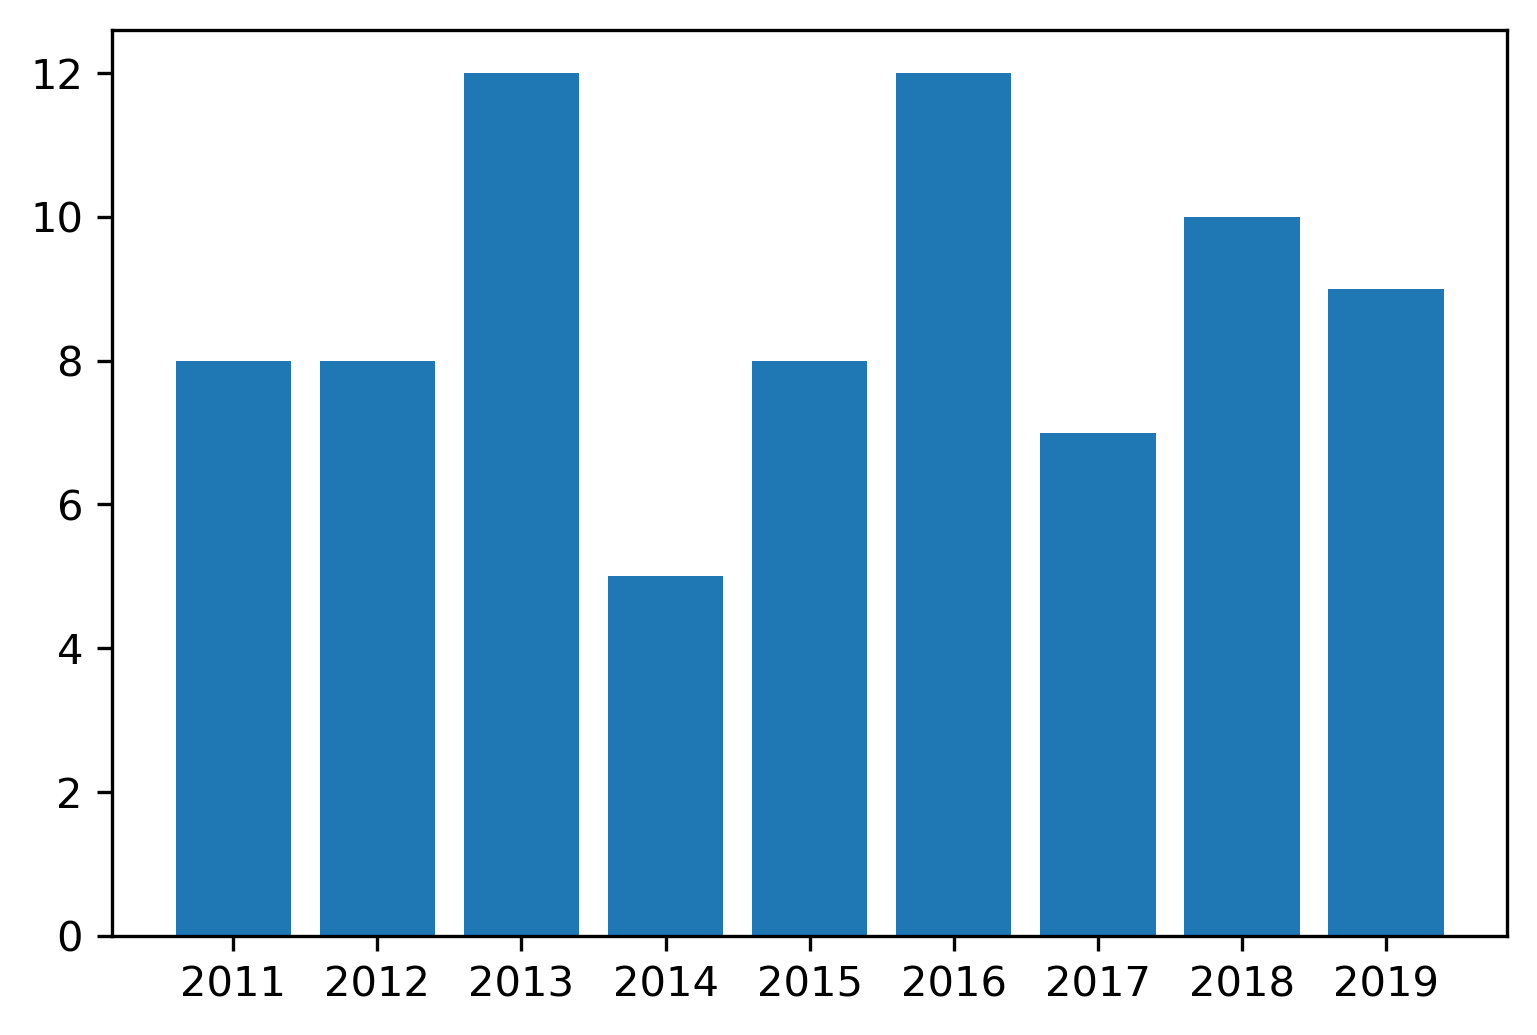

In [53]:
keep_ub_day=[]
first=-1
second=-1
x=range(9)
x_name=[i for i in range(2011,2020)]
long_ub_day=[]
when_ub_day=[]

for year_ub in abnormal_temperature:
    temp=[]
    for day_ub in year_ub:
        j=day_ub[0]
        second=j
        if second!=-1 and first==-1:
            first=j
        elif second!=third-1 and first!=-1:
            if first>j-2:
                first=-1
            else :
                temp.append([first,j-first])
                first=-1
        elif second!=-1 and first!=-1:
            third=second
    when_ub_day.append(temp)
    long_ub_day.append(len(temp))
print(when_ub_day)
print(long_ub_day)



plt.figure( dpi = 300)
plt.bar(x,long_ub_day) 
plt.xticks(x,x_name)
plt.show() 